In [126]:
import pandas
from sklearn.feature_selection import VarianceThreshold
df = pandas.read_csv('data/customer_behavior.csv')
df

,bachelor,gender,age,salary,purchased
0,1,0,23,1500,0
1,1,0,30,2500,1
2,1,0,32,1800,1
3,1,0,25,1700,0
4,1,0,27,1200,0
5,1,1,26,1000,0
6,1,1,35,3500,1
7,1,0,23,2000,1
8,1,0,22,1800,1
9,1,0,21,1700,0


In [129]:
X = df[['bachelor','gender', 'age', 'salary']]
sel = VarianceThreshold()
X_val = sel.fit_transform(X)
#X_val
#sel.get_support()
names = df.columns[sel.get_support()]
names

C:\ProgramData\Anaconda3\lib\site-packages\pandas\indexes\base.py:1434: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 4
  result = getitem(key)


Index(['gender', 'age', 'salary'], dtype='object')

In [130]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = df[['bachelor','gender', 'age', 'salary']]
y = df['purchased'].values
clf = SelectKBest(chi2, k=2)
clf.fit(X,y)
print(clf.scores_)

[    0.             0.             4.48447205  2766.66666667]


In [131]:
X_new = clf.fit_transform(X,y)
print(X_new)

[[  23 1500]
 [  30 2500]
 [  32 1800]
 [  25 1700]
 [  27 1200]
 [  26 1000]
 [  35 3500]
 [  23 2000]
 [  22 1800]
 [  21 1700]
 [  38 5000]
 [  20 1200]]


In [75]:
from sklearn.cross_validation import cross_val_score, ShuffleSplit
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score
clf = DecisionTreeClassifier(random_state=123)
scores = []
for i in range(X_val.shape[1]):
    score = cross_val_score(clf, X_val[:, i:i+1], y, scoring="accuracy",
                              cv=ShuffleSplit(len(X_val), 3, .3))
    scores.append((round(np.mean(score), 3), names[i]))
print(sorted(scores, reverse=True))

[(0.83299999999999996, 'salary'), (0.66700000000000004, 'age'), (0.33300000000000002, 'gender')]


In [39]:
scores_chi2

array([ 1.,  1.,  1.])

In [97]:
?RFE

In [134]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

clf = SVC(kernel='linear')

rfe = RFE(clf, n_features_to_select=1)
rfe.fit(X_val,y)

for x in rfe.ranking_:
    print(names[x-1], rfe.ranking_[x-1])

salary 1
age 2
gender 3


In [135]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, random_state=123)

clf.fit(X_val, y)

names, clf.feature_importances_
for feature in zip(names, clf.feature_importances_):
    print(feature)

('gender', 0.093301587301587302)
('age', 0.39391203703703703)
('salary', 0.51278637566137575)


In [104]:
clf.feature_importances_

array([ 0.09330159,  0.39391204,  0.51278638])

In [113]:
range(1, names)

TypeError: 'Index' object cannot be interpreted as an integer

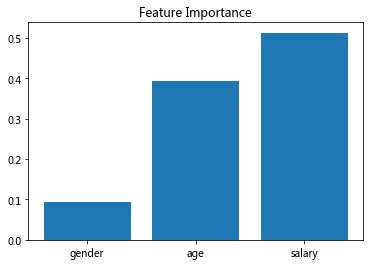

In [136]:
import matplotlib.pyplot as plt
plt.title('Feature Importance')
plt.bar(range(0, len(names)), clf.feature_importances_)
plt.xticks(range(0,len(names)), names)
plt.show()